In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

from pathlib import Path 
import os

from sklearn.decomposition import PCA # Algorithm


In [2]:
from pathlib import Path
data_path = Path("../data/MetroPT3(AirCompressor).csv")
print(data_path.resolve())

C:\Users\MSI\Desktop\Mlops\data\MetroPT3(AirCompressor).csv


In [3]:
data_path=Path("C:/Users/MSI/Desktop/Mlops/data/MetroPT3(AirCompressor).csv")

data=pd.read_csv(data_path)

In [4]:
from sklearn.preprocessing import StandardScaler
# Drop non-numeric column
df_numeric = data.drop(['timestamp', 'Unnamed: 0'], axis=1)

In [5]:
df_numeric.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
## Requirements to use PCA
# * Numeric data
# * Centring he Data (Mean-Centering):
# * Standardizing the Data (Scaling):
# * No missing values
# * Linearity:
# * Data with some level of correlation
# * Sufficient sample size

check data type

In [7]:
print(df_numeric.dtypes)

TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object


In [8]:
# Check the mean and standard deviation of each feature
print(df_numeric.describe())

                TP2           TP3            H1   DV_pressure    Reservoirs  \
count  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06   
mean   1.367826e+00  8.984611e+00  7.568155e+00  5.595619e-02  8.985233e+00   
std    3.250930e+00  6.390951e-01  3.333200e+00  3.824015e-01  6.383070e-01   
min   -3.200000e-02  7.300000e-01 -3.600000e-02 -3.200000e-02  7.120000e-01   
25%   -1.400000e-02  8.492000e+00  8.254000e+00 -2.200000e-02  8.494000e+00   
50%   -1.200000e-02  8.960000e+00  8.784000e+00 -2.000000e-02  8.960000e+00   
75%   -1.000000e-02  9.492000e+00  9.374000e+00 -1.800000e-02  9.492000e+00   
max    1.067600e+01  1.030200e+01  1.028800e+01  9.844000e+00  1.030000e+01   

       Oil_temperature  Motor_current          COMP    DV_eletric  \
count     1.516948e+06   1.516948e+06  1.516948e+06  1.516948e+06   
mean      6.264418e+01   2.050171e+00  8.369568e-01  1.606106e-01   
std       6.516261e+00   2.302053e+00  3.694052e-01  3.671716e-01   
min       1.

Those results led us to standardize the data before using PCA

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [10]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)


                      TP2       TP3        H1  DV_pressure  Reservoirs  \
TP2              1.000000 -0.011161 -0.961269     0.415025   -0.012403   
TP3             -0.011161  1.000000  0.224867    -0.153074    0.999993   
H1              -0.961269  0.224867  1.000000    -0.425513    0.226037   
DV_pressure      0.415025 -0.153074 -0.425513     1.000000   -0.153080   
Reservoirs      -0.012403  0.999993  0.226037    -0.153080    1.000000   
Oil_temperature  0.250710  0.401616 -0.161810     0.339697    0.401647   
Motor_current    0.697480  0.413756 -0.600178     0.302160    0.412691   
COMP            -0.955521  0.103295  0.971419    -0.423992    0.104509   
DV_eletric       0.947396 -0.078428 -0.958663     0.427813   -0.079640   
Towers          -0.616405  0.064937  0.628964    -0.285256    0.065729   
MPG             -0.941250  0.088343  0.954307    -0.417284    0.089555   
LPS              0.057651 -0.324556 -0.133178     0.011928   -0.325235   
Pressure_switch -0.069532  0.025240  0

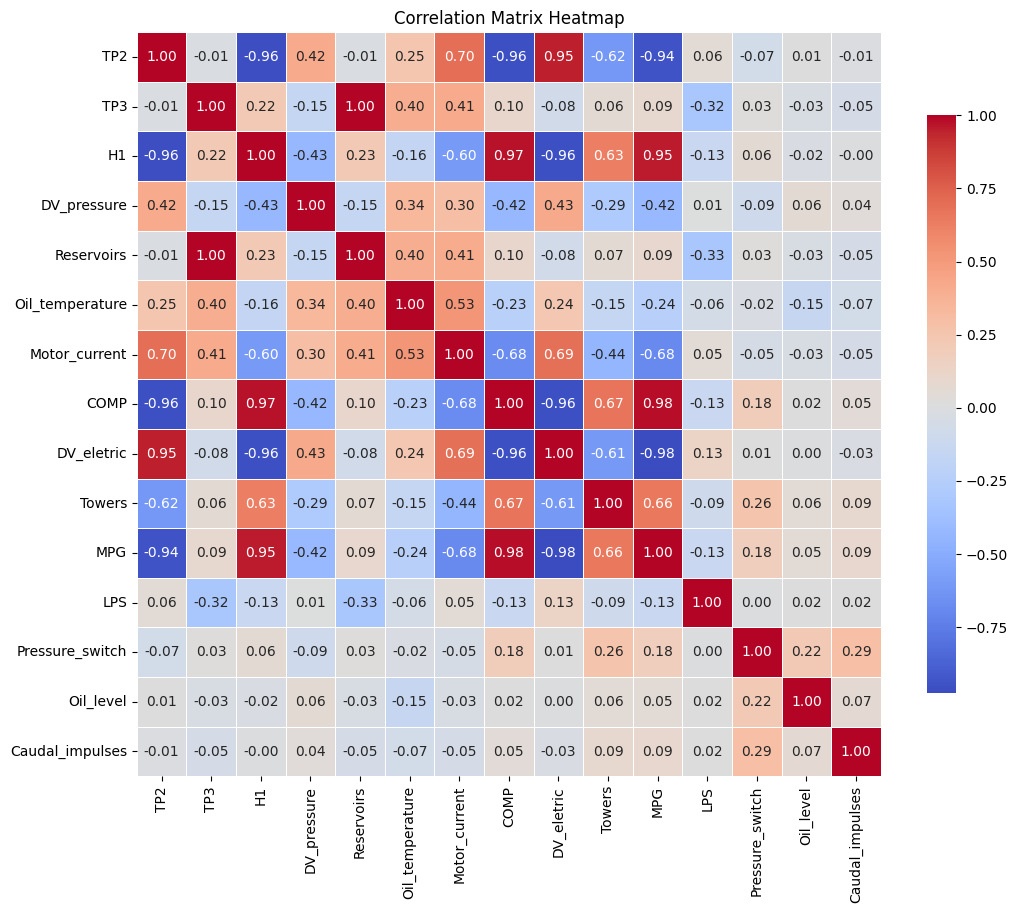

In [11]:
# Set up the figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})

# Add a title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

In [12]:
# Check the shape of the dataset
n_samples, n_features = df_numeric.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")


Number of samples: 1516948
Number of features: 15


In [13]:
# Calculate the correlation matrix and unstack it
correlation_matrix = df_numeric.corr().abs().unstack()

# Sort correlation values in descending order and remove self-correlations
sorted_pairs = correlation_matrix.sort_values(kind="quicksort", ascending=False)
high_corr_pairs = sorted_pairs[(sorted_pairs < 1.0) & (sorted_pairs > 0.7)]

# Display the most correlated pairs
print("Top correlated feature pairs:")
print(high_corr_pairs.head(10))

Top correlated feature pairs:
TP3         Reservoirs    0.999993
Reservoirs  TP3           0.999993
COMP        MPG           0.984555
MPG         COMP          0.984555
            DV_eletric    0.975641
DV_eletric  MPG           0.975641
COMP        H1            0.971419
H1          COMP          0.971419
TP2         H1            0.961269
H1          TP2           0.961269
dtype: float64


In [14]:
# Initialize PCA and fit it to the standardized data
pca = PCA()
pca.fit(df_numeric)

# Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)

Explained variance by each principal component: [6.56660585e-01 2.96645077e-01 3.25596786e-02 7.95014949e-03
 1.82444769e-03 1.38810549e-03 1.13891350e-03 8.59431605e-04
 5.87169843e-04 1.82871664e-04 1.39589945e-04 3.78510063e-05
 2.10217324e-05 5.07864180e-06 2.83256029e-08]


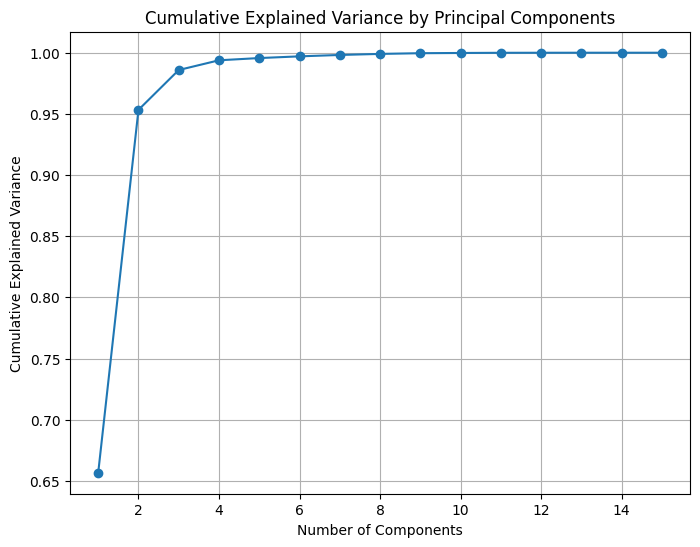

In [15]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [16]:
# Choose the number of components (e.g., keep components that explain 90% of variance)
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

# Initialize PCA with the chosen number of components
pca = PCA(n_components=n_components)
df_reduced = pca.fit_transform(df_numeric)

print(f"Reduced dataset shape: {df_reduced.shape}")


Reduced dataset shape: (1516948, 2)


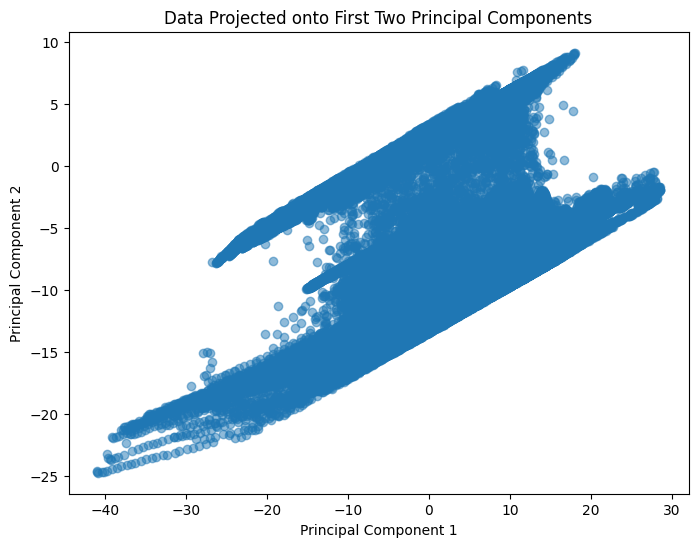

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projected onto First Two Principal Components")
plt.show()


Anomaly Detection Using Isolation Forest:
 Pros: Efficient on large datasets, handles high-dimensional data well, and does not require labeling data.

In [18]:
#Initialize and Fit the Model
from sklearn.ensemble import IsolationForest

# Assuming `pca_data` is your data transformed by PCA
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(df_reduced)


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


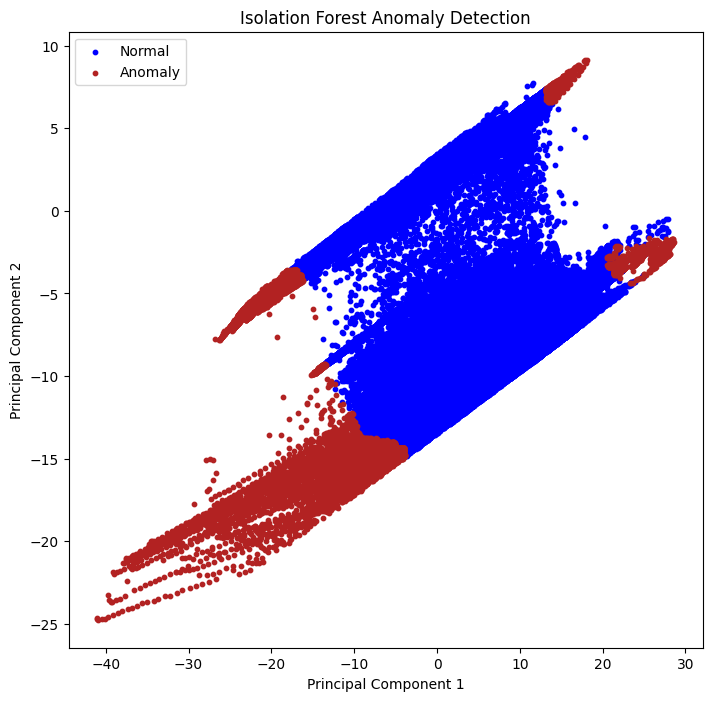

In [19]:
# Isolation Forest results
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.scatter(df_reduced[anomalies == 1, 0], df_reduced[anomalies == 1, 1], color='blue', s=10, label='Normal')
plt.scatter(df_reduced[anomalies == -1, 0], df_reduced[anomalies == -1, 1], color='Firebrick', s=10, label='Anomaly')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()


The anomalies array will contain -1 for outliers and 1 for inliers. Points labeled -1 are potential anomalies.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Description: DBSCAN is a density-based clustering algorithm that identifies clusters based on the density of data points. Points in sparse regions are classified as outliers (anomalies).
Pros: No need to specify the number of clusters; works well for data with clusters of varying shapes and densities.
Cons: Parameter sensitivity (eps and min_samples); may struggle with high-dimensional data.

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_preds = dbscan.fit_predict(df_reduced)  # -1 represents anomalies


MemoryError: 

Autoencoders (Neural Network-Based Anomaly Detection)
Description: Autoencoders are neural networks that learn to compress and then reconstruct data. Anomalies can be identified by reconstruction error—if a point cannot be accurately reconstructed, it may be an anomaly.
Pros: Very flexible, able to capture complex data structures; can be used for both high- and low-dimensional data.
Cons: Requires more computational resources; training may require tuning for architecture, layers, and regularization.

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple autoencoder
input_dim = df_reduced.shape[1]
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")
])

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(df_reduced, df_reduced, epochs=10, batch_size=32, validation_split=0.1)

# Reconstruction error
reconstructions = autoencoder.predict(df_reduced)
mse = np.mean(np.power(df_reduced - reconstructions, 2), axis=1)
# Option A: Using the 95th percentile
threshold = np.percentile(mse, 95)

print("Threshold for anomaly detection:", threshold)
anomalies = mse > threshold  # Define a threshold for anomaly detection


Epoch 1/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 31.3445 - val_loss: 18.1650
Epoch 2/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - loss: 31.2525 - val_loss: 18.1648
Epoch 3/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 31.2742 - val_loss: 18.1648
Epoch 4/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 31.2256 - val_loss: 18.1648
Epoch 5/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - loss: 31.2686 - val_loss: 18.1648
Epoch 6/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - loss: 31.2746 - val_loss: 18.1648
Epoch 7/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 31.2051 - val_loss: 18.1648
Epoch 8/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 2056s 48ms/step - loss: 31.3166 - val_loss: 18.1648
Epoch 9/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - loss: 31.2707 - val_loss: 18.1647
Epoch 10/10
42665/42665 ━━━━━━━━━━━━━━━━━━━━ 107s 3ms/step - loss: 31.2849 - val_loss: 18.1647
47405/47405 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step
Threshold for anom

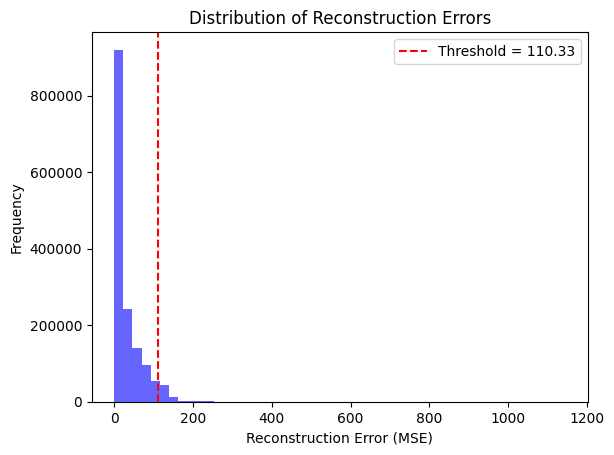

In [24]:
# Visualization

plt.hist(mse, bins=50, alpha=0.6, color='b')
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Reconstruction Errors")
plt.show()


Epoch 1/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 30.1621 - val_loss: 29.9499
Epoch 2/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - loss: 29.9526 - val_loss: 29.9487
Epoch 3/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 29.9718 - val_loss: 29.9486
Epoch 4/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 29.9494 - val_loss: 29.9487
Epoch 5/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 29.9425 - val_loss: 29.9487
Epoch 6/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 30.0012 - val_loss: 29.9488
Epoch 7/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 29.9306 - val_loss: 29.9499
Epoch 8/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 29.9962 - val_loss: 29.9491
23703/23703 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step


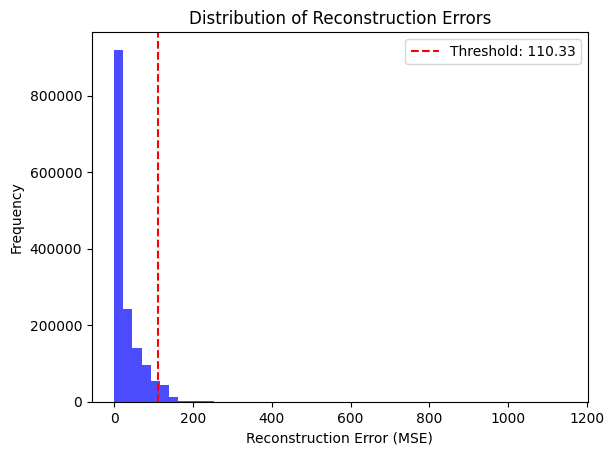

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split

# Define model parameters
input_dim = df_reduced.shape[1]
hidden_dim_1 = 16
hidden_dim_2 = 8
learning_rate = 0.001

# Split the dataset to reduce validation split during training
X_train, X_val = train_test_split(df_reduced, test_size=0.1, random_state=42)

# Build the optimized autoencoder model
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(hidden_dim_1, activation="relu"),
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(hidden_dim_2, activation="relu"),
    layers.BatchNormalization(),  # Batch normalization for stable training
    layers.Dense(hidden_dim_1, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")  # Sigmoid activation for output layer
])

# Compile the model with an Adam optimizer and mean squared error loss
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")

# Define callbacks for early stopping and model checkpointing
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
# Define the model checkpoint callback with the correct file extension
model_checkpoint = callbacks.ModelCheckpoint("best_autoencoder.keras", save_best_only=True, monitor="val_loss")

# Train the model with the defined callbacks
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Load the best model after training
autoencoder = models.load_model("best_autoencoder.keras")

# Calculate reconstruction error for anomaly detection
reconstructions = autoencoder.predict(df_reduced, batch_size=64)
mse = np.mean(np.power(df_reduced - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set threshold to 95th percentile for anomaly detection
anomalies = mse > threshold

# Visualization of the reconstruction errors
import matplotlib.pyplot as plt
plt.hist(mse, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Reconstruction Errors')
plt.show()


In [36]:
print("Threshold for anomaly detection:", threshold)

Threshold for anomaly detection: 110.32807133858101


K-Means Clustering
Description: K-Means is a clustering algorithm that divides data into 
𝑘
k clusters. Anomalies can be defined as points that are farthest from their assigned cluster centroids.
Pros: Simple to implement; works well with low-dimensional, spherical clusters.
Cons: Requires specifying 
𝑘
k; may not work well if clusters are not spherical or of varying densities.

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_reduced)
distances = pairwise_distances_argmin_min(df_reduced, kmeans.cluster_centers_)[1]
threshold = np.percentile(distances, 95)  # Set a threshold based on distance
anomalies = distances > threshold


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


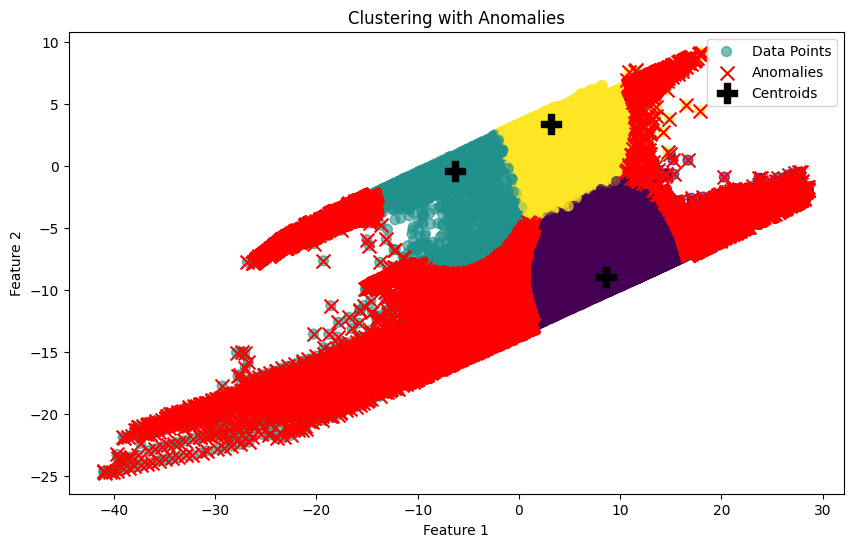

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_reduced is your 2D dataset and contains the x and y coordinates
x = df_reduced[:, 0]  # First feature
y = df_reduced[:, 1]  # Second feature

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6, label='Data Points')

# Mark the anomalies
anomaly_points = df_reduced[anomalies]
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', s=100, marker='x', label='Anomalies')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='P', label='Centroids')

# Adding labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering with Anomalies')
plt.legend()
plt.show()


LOF (Local Outlier Factor)
Description: LOF is a density-based method that compares the local density of each point to that of its neighbors. Points with a significantly lower density than their neighbors are considered anomalies.
Pros: Effective in detecting anomalies in datasets with clusters of varying densities.
Cons: Sensitive to parameter tuning (n_neighbors); computationally intensive for large datasets.

In [39]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_preds = lof.fit_predict(df_reduced)  # -1 indicates anomalies


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


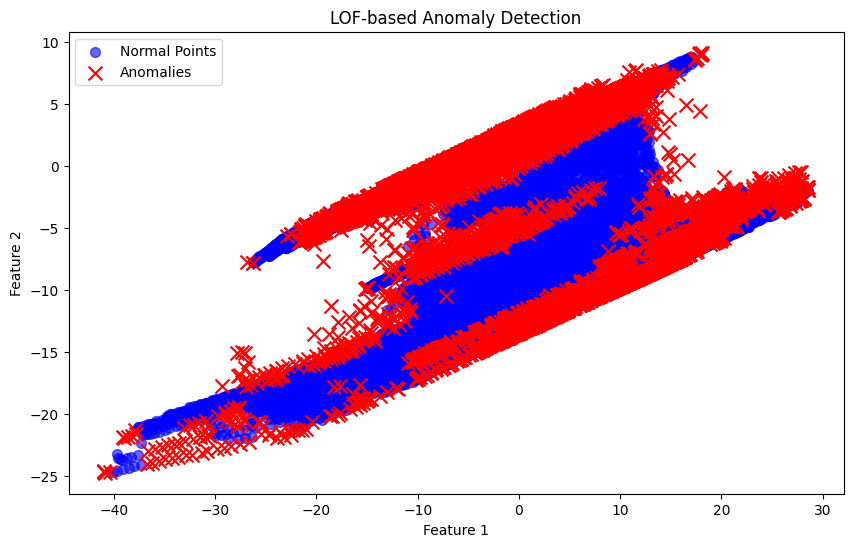

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_reduced is a 2D dataset with two features
x = df_reduced[:, 0]  # First feature
y = df_reduced[:, 1]  # Second feature

# Identify anomalies and normal points based on LOF predictions
anomalies_lof = df_reduced[lof_preds == -1]
normal_points = df_reduced[lof_preds == 1]

# Plot normal points
plt.figure(figsize=(10, 6))
plt.scatter(normal_points[:, 0], normal_points[:, 1], color='blue', s=50, alpha=0.6, label='Normal Points')

# Plot anomalies
plt.scatter(anomalies_lof[:, 0], anomalies_lof[:, 1], color='red', s=100, marker='x', label='Anomalies')

# Adding labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LOF-based Anomaly Detection')
plt.legend()
plt.show()


Choosing the Right Model
Isolation Forest and One-Class SVM: Good for detecting anomalies in high-dimensional data.
DBSCAN and LOF: Effective in datasets with clusters of varying densities and shapes.
Autoencoders: Suitable for complex, non-linear data patterns, especially with larger datasets.
K-Means: Works well if data can be naturally grouped into clusters.

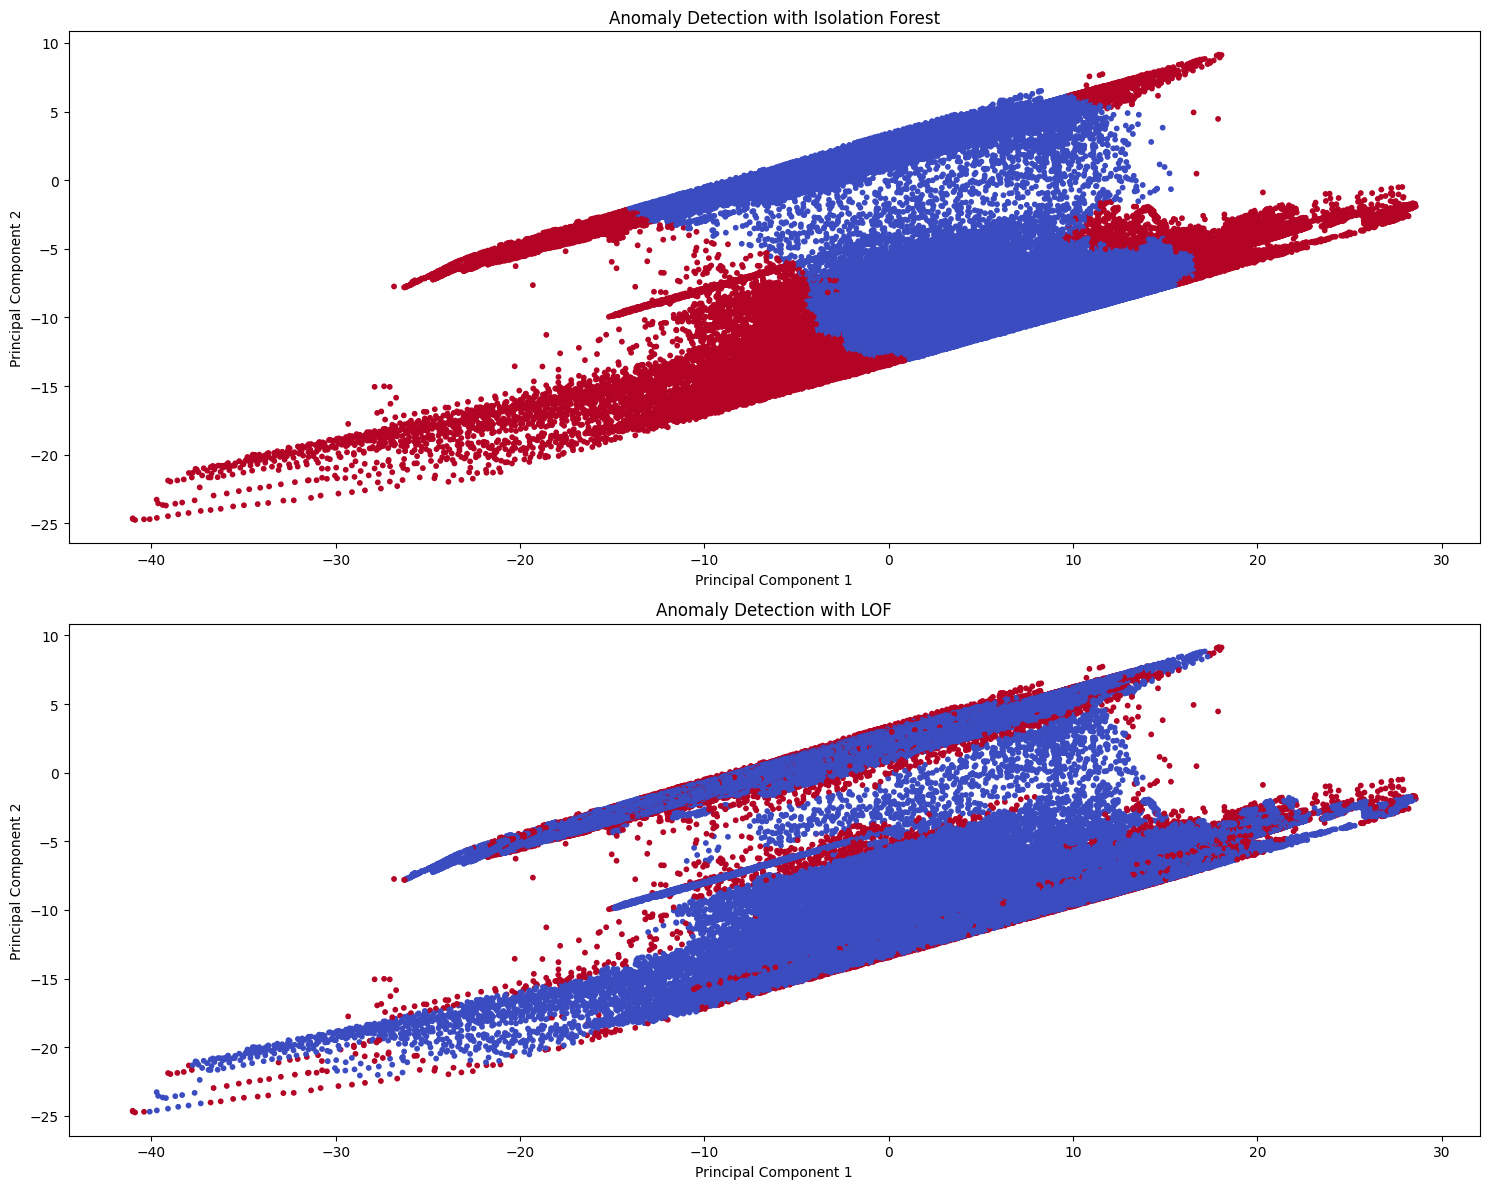

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

# Assuming `df_reduced` is your PCA-transformed data
models = {
    "Isolation Forest": IsolationForest(contamination=0.05, random_state=42),
    
    "LOF": LocalOutlierFactor(n_neighbors=20, contamination=0.05)
}

# Set up the subplots for visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    if name == "LOF":
        preds = model.fit_predict(df_reduced)
    else:
        preds = model.fit(df_reduced).predict(df_reduced)

    # Convert predictions to a format where -1 is anomaly, 1 is normal
    if name == "Isolation Forest":
        # DBSCAN labels anomalies as -1 and clusters with numbers >= 0
        anomaly_labels = np.where(preds == -1, -1, 1)
    else:
        anomaly_labels = preds

    # Plot
    axes[i].scatter(df_reduced[:, 0], df_reduced[:, 1], c=(anomaly_labels == -1), cmap='coolwarm', s=10)
    axes[i].set_title(f"Anomaly Detection with {name}")
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [42]:
## Testing the models results

In [44]:
df = data.drop(['Unnamed: 0'], axis=1)
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [48]:
import pandas as pd

# Example data (assuming your original dataset is in a DataFrame named 'df')
failures = [
    {"start": "2020-04-18 00:00:00", "end": "2020-04-18 23:59:00"},
    {"start": "2020-05-29 23:30:00", "end": "2020-05-30 06:00:00"},
    {"start": "2020-06-05 10:00:00", "end": "2020-06-07 14:30:00"},
    {"start": "2020-07-15 14:30:00", "end": "2020-07-15 19:00:00"}
]

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Air_Leak'] = 0  # Initialize all as normal

# Loop over each failure period and label anomalies
for failure in failures:
    start_time = pd.to_datetime(failure["start"])
    end_time = pd.to_datetime(failure["end"])
    df.loc[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time), 'Air_Leak'] = 1


In [49]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,label,Air_Leak
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0


In [50]:
# Extract features and labels
X = df_reduced  # Features only
y_true = df['Air_Leak']  # True labels: 1 for air leak, 0 for normal


In [53]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to print the evaluation metrics
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name} Model Performance:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate each model
evaluate_model("Isolation Forest", y_true, anomalies)
evaluate_model("Local Outlier Factor", y_true, lof_preds)
#evaluate_model("Autoencoder", y_true, autoencoder_preds)



Isolation Forest Model Performance:
Confusion Matrix:
 [[1420419   66575]
 [  20681    9273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97   1486994
           1       0.12      0.31      0.18     29954

    accuracy                           0.94   1516948
   macro avg       0.55      0.63      0.57   1516948
weighted avg       0.97      0.94      0.95   1516948


Local Outlier Factor Model Performance:
Confusion Matrix:
 [[      0       0       0]
 [  73372       0 1413622]
 [   2476       0   27478]]


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00   1486994
           1       0.02      0.92      0.04     29954

    accuracy                           0.02   1516948
   macro avg       0.01      0.31      0.01   1516948
weighted avg       0.00      0.02      0.00   1516948



C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Prepare the data
X = df_reduced  # Assuming df_reduced is the preprocessed feature data

# Split into training and validation sets
X_train, X_val = train_test_split(X, test_size=0.1, random_state=42)

# Step 2: Build the autoencoder model
input_dim = X.shape[1]  # Number of features in the data
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(8, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(16, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")  # Sigmoid for normalized reconstruction
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Step 3: Train the autoencoder
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = autoencoder.fit(
    X_train, X_train,  # Both input and target are the same
    epochs=50,
    batch_size=64,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping],
    verbose=1
)

# Step 4: Compute reconstruction errors for each observation
reconstructions = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructions, 2), axis=1)

# Step 5: Define a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(mse, 95)
print(f"Reconstruction error threshold: {threshold}")

# Step 6: Classify observations as normal (0) or anomalous (1)
autoencoder_preds = np.where(mse > threshold, 1, 0)

# Step 7: Evaluate the model
# Assuming y_true contains the true labels for anomalies (1) and normal (0) observations
y_true = df['Air_Leak']  # Actual labels for evaluation

# Evaluate performance
print("Autoencoder Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_true, autoencoder_preds))
print("Classification Report:\n", classification_report(y_true, autoencoder_preds))


Epoch 1/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 30.0586 - val_loss: 29.9507
Epoch 2/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 29.9942 - val_loss: 29.9507
Epoch 3/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 30.0131 - val_loss: 29.9487
Epoch 4/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - loss: 29.9606 - val_loss: 29.9492
Epoch 5/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - loss: 30.0240 - val_loss: 29.9489
Epoch 6/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 30.0002 - val_loss: 29.9488
Epoch 7/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 30.0129 - val_loss: 29.9489
Epoch 8/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - loss: 30.0144 - val_loss: 29.9487
Epoch 9/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 29.9839 - val_loss: 29.9486
Epoch 10/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 29.9725 - val_loss: 29.9493
Epoch 11/50
21333/21333 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 30.

### Interpretation of the Autoencoder Model's Performance:

#### 1. **Confusion Matrix:**
   ```
   [[1436951   50043]   --> Predicted Normal (0)
    [   4149   25805]]   --> Predicted Anomalous (1)
   ```
   - **True Negatives (TN)**: 1,436,951 - These are correctly classified normal (0) observations.
   - **False Positives (FP)**: 50,043 - These are normal (0) observations incorrectly classified as anomalies (1).
   - **False Negatives (FN)**: 4,149 - These are anomalies (1) incorrectly classified as normal (0).
   - **True Positives (TP)**: 25,805 - These are correctly classified anomalies (1).

#### 2. **Classification Report:**
   - **Precision**: Precision measures the accuracy of the positive predictions (anomalies in this case).
     - **Normal Class (0)**: Precision is 1.00, indicating that when the model predicts normal, it's highly accurate.
     - **Anomalous Class (1)**: Precision is 0.34, indicating a high number of false positives (i.e., it predicts anomalies too frequently).
   
   - **Recall**: Recall measures how well the model identifies positive samples (anomalies).
     - **Normal Class (0)**: Recall is 0.97, indicating that 97% of true normal instances are correctly identified.
     - **Anomalous Class (1)**: Recall is 0.86, meaning 86% of true anomalies are identified, but 14% are missed (false negatives).
   
   - **F1-Score**: The F1-Score is the harmonic mean of precision and recall, providing a balance between the two metrics.
     - **Normal Class (0)**: The F1-score is 0.98, which is excellent.
     - **Anomalous Class (1)**: The F1-score is 0.49, which is relatively low, indicating that while the model identifies a good portion of the anomalies, it struggles with false positives and false negatives.

#### 3. **Accuracy**:
   - The overall accuracy is **96%**, which means the model is performing well at identifying normal and anomalous observations. However, this metric can be misleading in the case of imbalanced datasets, as the model might be very good at predicting the majority class (normal), but struggle with the minority class (anomalous).

#### 4. **Macro Average**:
   - **Precision**: 0.67
   - **Recall**: 0.91
   - **F1-Score**: 0.73
   - These averages provide insight into the model's overall performance across both classes. The recall is high, indicating the model is good at identifying anomalies, but precision is lower, showing that it frequently misclassifies normal instances as anomalies.

#### 5. **Weighted Average**:
   - The weighted averages give more importance to the larger class (normal). Since the normal class dominates the dataset, the weighted precision, recall, and F1-score for normal (0) are high, while for anomalies (1) they are lower, reflecting the challenges in identifying rare events.

### Summary:
- The autoencoder performs well for detecting **normal instances**, with **high precision** and **recall** for the normal class (0).
- For detecting **anomalies**, the model has a **moderate recall (0.86)**, but **low precision (0.34)**, meaning it tends to classify many normal instances as anomalies, leading to a lot of **false positives**.
- **F1-Score** for anomalies is relatively low (0.49), indicating that while the model identifies a majority of anomalies, its false positive rate is high, leading to poor precision.

The model is **effective in detecting anomalies**, but you might want to **tune the threshold** for anomaly detection or explore other techniques like **Isolation Forest** or **Local Outlier Factor** to improve the precision for the anomalous class (1).